In [8]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt



In [9]:
conn = psycopg2.connect(dbname = "postgres",
                  user = "postgres",
                  password = "password",
                  host = "localhost",
                  port = "5432")

In [10]:
cursor=conn.cursor()

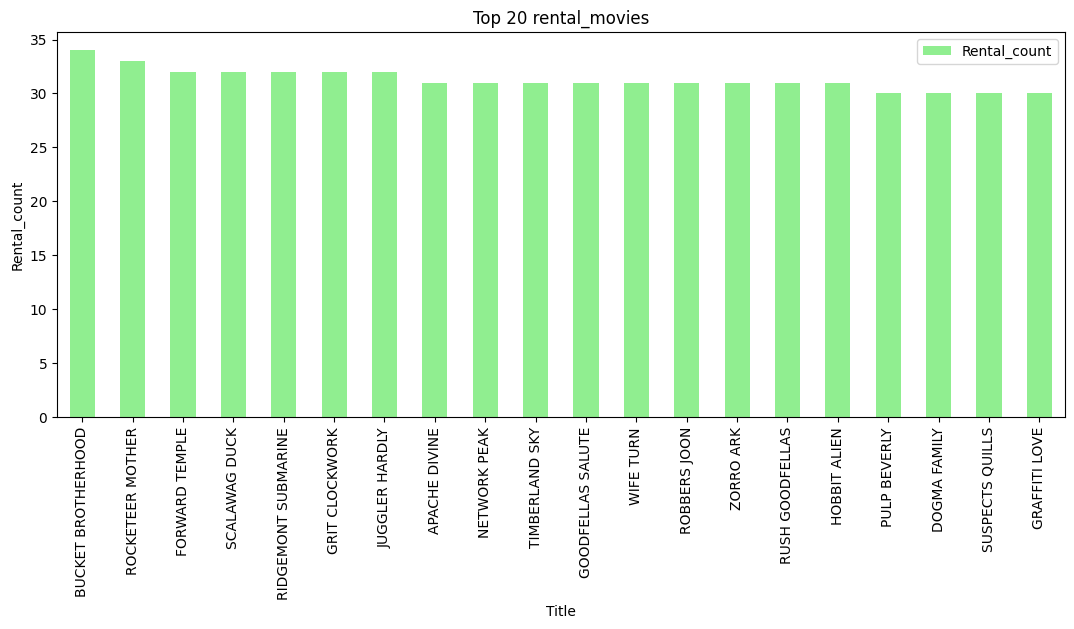

In [11]:
cursor.execute("""Select film.title,count(rental.rental_id) As Rental_count from rental join inventory on rental.inventory_id = inventory.inventory_id join
film on inventory.film_id=film.film_id group by title order by Rental_count DESC Limit 20""");
rows=cursor.fetchall()
df=pd.DataFrame(rows)
df.columns=("Title","Rental_count")

df.plot.bar(x="Title", y="Rental_count",color="lightgreen",figsize=(13,5))

plt.title("Top 20 rental_movies")
plt.xlabel("Title")
plt.ylabel("Rental_count")

plt.show()




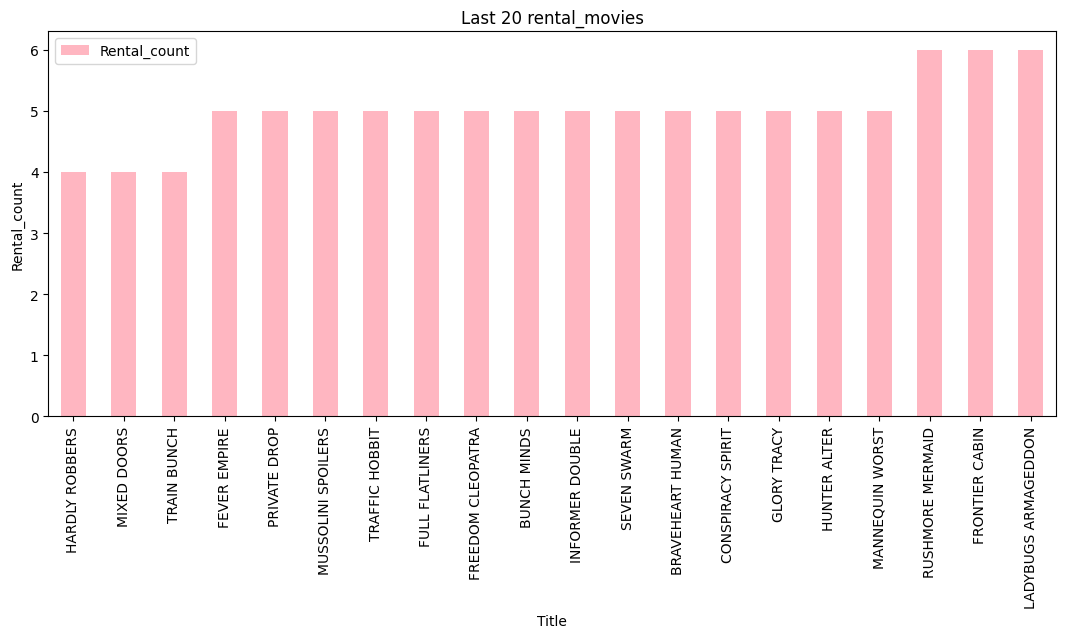

In [12]:
cursor.execute("""Select film.title,count(rental.rental_id) As Rental_count from rental join inventory on rental.inventory_id = inventory.inventory_id join
film on inventory.film_id=film.film_id group by title order by Rental_count ASC Limit 20""");
rows=cursor.fetchall()
df=pd.DataFrame(rows)
df.columns=("Title","Rental_count")

df.plot.bar(x="Title", y="Rental_count",color='lightpink', figsize=(13,5))

plt.title("Last 20 rental_movies")
plt.xlabel("Title")
plt.ylabel("Rental_count")

plt.show()

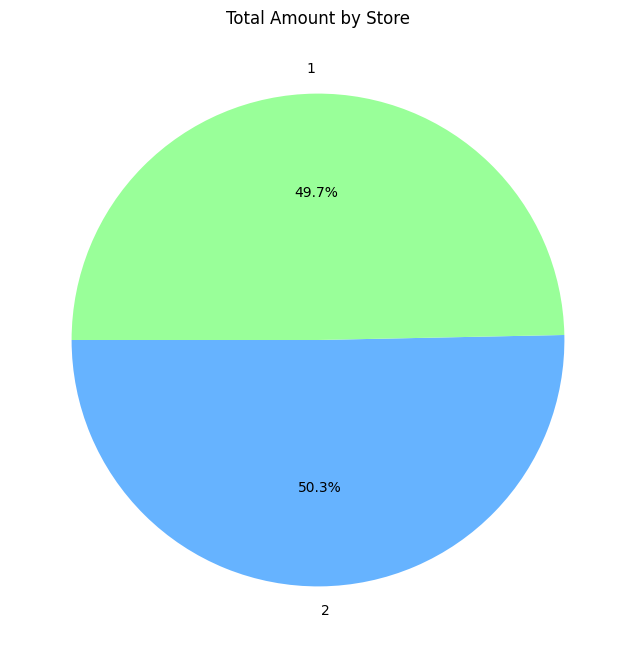

In [13]:
cursor.execute("""Select  staff.store_id,sum(payment.amount) as total_amount from staff 
 join payment on staff.staff_id = payment.staff_id 
group by store_id""");
rows=cursor.fetchall()
df=pd.DataFrame(rows)
df.columns=("Store_id","Total_amount")

plt.figure(figsize=(8, 8))
plt.pie(df["Total_amount"], labels=df["Store_id"],colors=["#66b3ff","#99ff99"], autopct='%1.1f%%', startangle=180)
plt.title("Total Amount by Store")
plt.show()

[('Sports', Decimal('11599577.85')), ('Animation', Decimal('11295109.63')), ('Sci-Fi', Decimal('10520038.55')), ('Action', Decimal('10511287.15')), ('Family', Decimal('10448683.91')), ('Foreign', Decimal('10111163.79')), ('Drama', Decimal('10107225.66')), ('Documentary', Decimal('9917665.66')), ('Games', Decimal('9307854.08')), ('New', Decimal('9265175.64')), ('Classics', Decimal('9102979.13')), ('Children', Decimal('9069927.23')), ('Comedy', Decimal('9064238.82')), ('Horror', Decimal('8364898.08')), ('Travel', Decimal('7922971.42')), ('Music', Decimal('7817689.74'))]


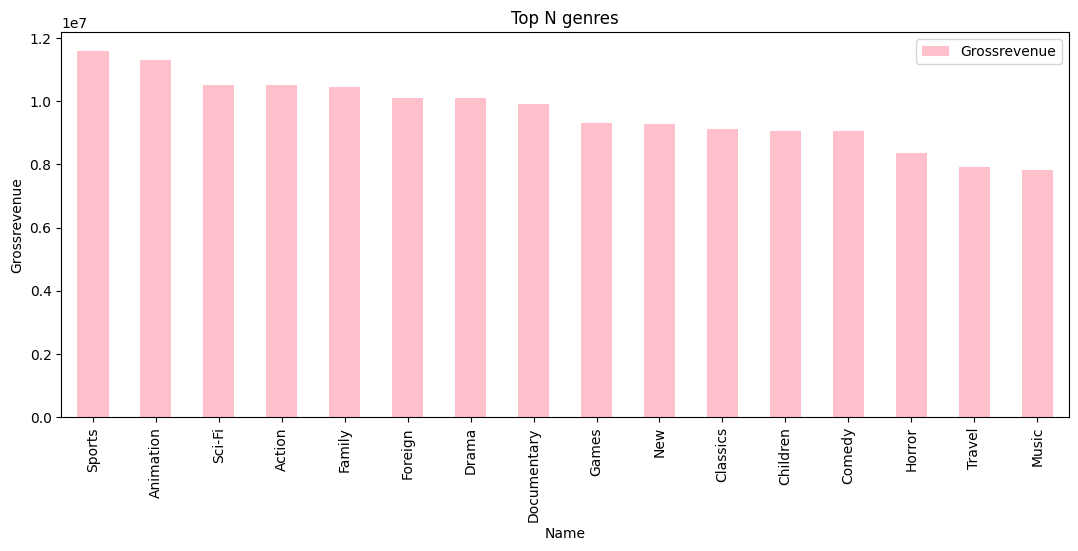

In [14]:
cursor.execute("""Select category.name ,sum(payment.amount) as Grossrevenue from category 
join film_category on category.category_id =film_category.category_id
join inventory on film_category.film_id= inventory.film_id
join staff on inventory.store_id =staff.store_id
join payment on staff.staff_id = payment.staff_id
group by category.name  order by Grossrevenue  desc""");
rows=cursor.fetchall()
print(rows)
df=pd.DataFrame(rows)
df.columns=("Name","Grossrevenue")
df["Grossrevenue"] = pd.to_numeric(df["Grossrevenue"])


df.plot.bar(x="Name", y="Grossrevenue",color='pink',figsize=(13,5))

plt.title("Top N genres")
plt.xlabel("Name")
plt.ylabel("Grossrevenue")

plt.show()

[('Sci-Fi', Decimal('21.1539344262295082')), ('Drama', Decimal('21.0867741935483871')), ('Classics', Decimal('21.0075438596491228')), ('Action', Decimal('20.9118750000000000')), ('Sports', Decimal('20.3954054054054054')), ('Games', Decimal('20.2850819672131148')), ('Animation', Decimal('20.1263636363636364')), ('Children', Decimal('20.0566666666666667')), ('Horror', Decimal('19.8650000000000000')), ('Family', Decimal('19.7291304347826087')), ('Documentary', Decimal('19.6223529411764706')), ('Music', Decimal('19.4409803921568627')), ('New', Decimal('19.4185714285714286')), ('Travel', Decimal('19.0250877192982456')), ('Comedy', Decimal('19.0244827586206897')), ('Foreign', Decimal('18.6475342465753425'))]


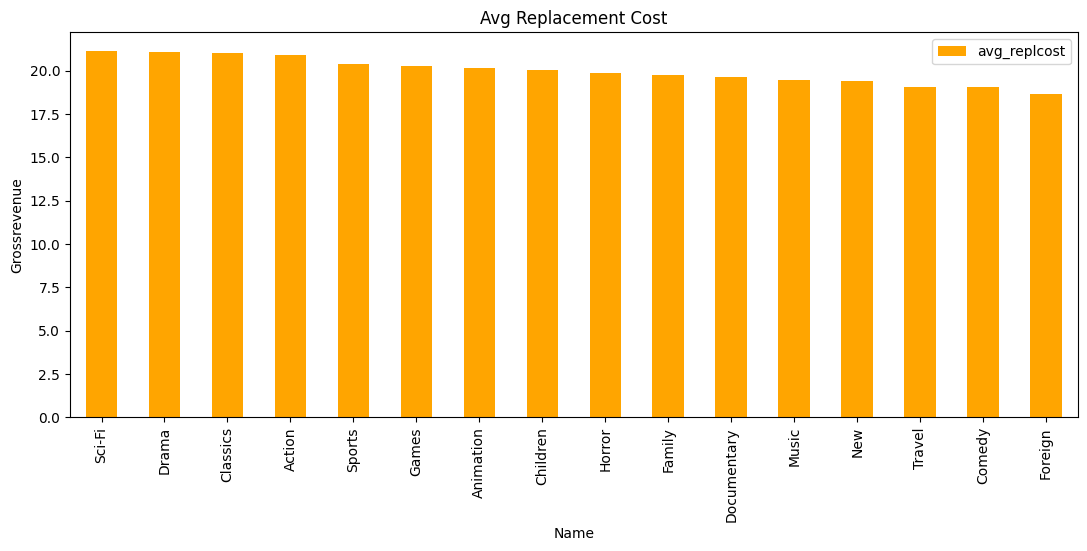

In [15]:
cursor.execute("""Select category.name, avg(film.replacement_cost) as avg_replcost from 
category join film_category on category.category_id = film_category.category_id
join film on  film_category.film_id =film.film_id group by category.name 
order by avg_replcost desc
""");
rows=cursor.fetchall()
print(rows)
df=pd.DataFrame(rows)
df.columns=("Name","avg_replcost")
df["avg_replcost"] = pd.to_numeric(df["avg_replcost"])


df.plot.bar(x="Name", y="avg_replcost", color='orange', figsize=(13,5))

plt.title("Avg Replacement Cost")
plt.xlabel("Name")
plt.ylabel("Grossrevenue")
plt.show()

[('G', 178), ('PG-13', 223), ('R', 195), ('NC-17', 210), ('PG', 194)]


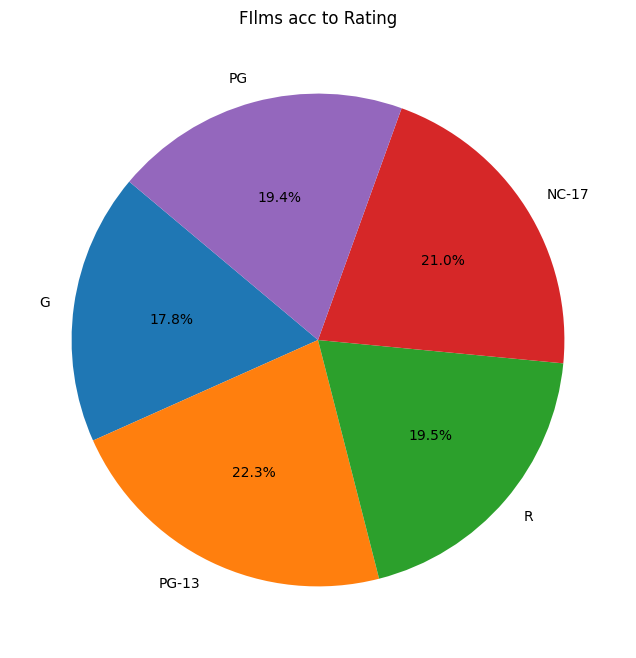

In [16]:
cursor.execute("""Select rating,count(film_id)as total_films from film group by rating
""");
rows=cursor.fetchall()
print(rows)
df=pd.DataFrame(rows)
df.columns=("Rating","total_films")
plt.figure(figsize=(8, 8))
plt.pie(df["total_films"], labels=df["Rating"], autopct='%1.1f%%', startangle=140)
plt.title("FIlms acc to Rating")
plt.show()



In [17]:
cursor.execute("""Select category.name as Genre, avg(film.rental_rate) as total_amount, 
avg(film.replacement_cost)as Avg_repl_cost 
from category 
join film_category on category.category_id =film_category.category_id
join film on film_category.category_id = film.film_id
group by Genre""")
rows=cursor.fetchall()
print(rows)
df=pd.DataFrame(rows)
df.columns=["Genre","total_amount","Avg_repl_cost"]
df["Rentals_needed_for_Repalcement"]=[round(x/y,2) for x,y in zip(df["Avg_repl_cost"],df["total_amount"])]
display(df)


[('Sports', Decimal('2.9900000000000000'), Decimal('10.9900000000000000')), ('Classics', Decimal('2.9900000000000000'), Decimal('26.9900000000000000')), ('New', Decimal('4.9900000000000000'), Decimal('21.9900000000000000')), ('Family', Decimal('4.9900000000000000'), Decimal('15.9900000000000000')), ('Comedy', Decimal('2.9900000000000000'), Decimal('22.9900000000000000')), ('Animation', Decimal('4.9900000000000000'), Decimal('12.9900000000000000')), ('Travel', Decimal('2.9900000000000000'), Decimal('23.9900000000000000')), ('Music', Decimal('0.99000000000000000000'), Decimal('22.9900000000000000')), ('Drama', Decimal('4.9900000000000000'), Decimal('28.9900000000000000')), ('Horror', Decimal('0.99000000000000000000'), Decimal('16.9900000000000000')), ('Sci-Fi', Decimal('0.99000000000000000000'), Decimal('23.9900000000000000')), ('Games', Decimal('4.9900000000000000'), Decimal('24.9900000000000000')), ('Documentary', Decimal('2.9900000000000000'), Decimal('17.9900000000000000')), ('Foreig

,Genre,total_amount,Avg_repl_cost,Rentals_needed_for_Repalcement
0,Sports,2.9900000000000000,10.9900000000000000,3.68
1,Classics,2.9900000000000000,26.9900000000000000,9.03
2,New,4.9900000000000000,21.9900000000000000,4.41
3,Family,4.9900000000000000,15.9900000000000000,3.20
4,Comedy,2.9900000000000000,22.9900000000000000,7.69
5,Animation,4.9900000000000000,12.9900000000000000,2.60
6,Travel,2.9900000000000000,23.9900000000000000,8.02
7,Music,0.99000000000000000000,22.9900000000000000,23.22
8,Drama,4.9900000000000000,28.9900000000000000,5.81
9,Horror,0.99000000000000000000,16.9900000000000000,17.16


Analysis :-Sales by store

[(2, Decimal('33927.04')), (1, Decimal('33489.47'))]


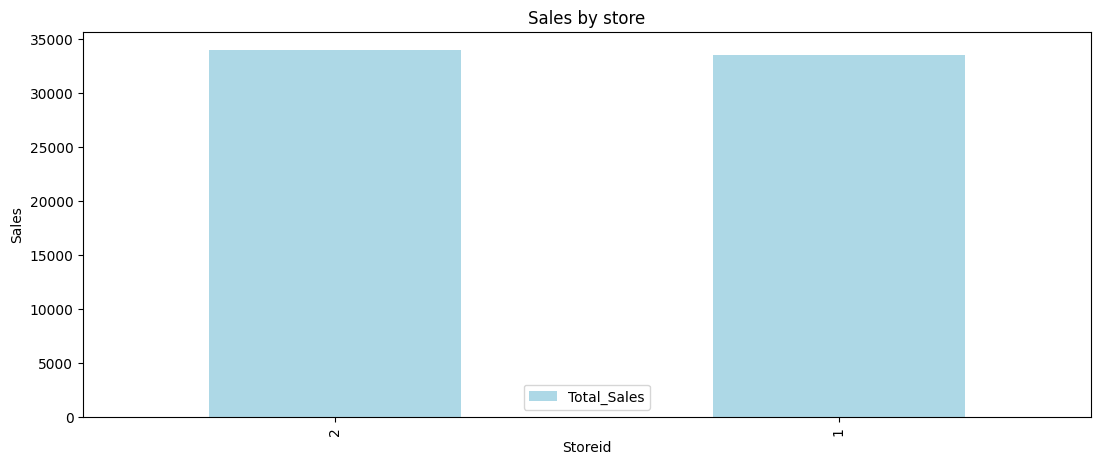

In [18]:
cursor.execute("""Select staff.store_id,sum(payment.amount) as Total_Sales from staff 
join payment on staff.staff_id= payment.staff_id group by store_id;
""");
rows=cursor.fetchall()
print(rows)
df=pd.DataFrame(rows)
df.columns=("Store_id","Total_Sales")
df["Total_Sales"] = pd.to_numeric(df["Total_Sales"])



df.plot.bar(x="Store_id", y="Total_Sales",color='lightblue', figsize=(13,5))

plt.title("Sales by store")
plt.xlabel("Storeid")
plt.ylabel("Sales")


plt.show()

Analysis :- Sales by month

[(Decimal('1'), Decimal('3094.78')), (Decimal('2'), Decimal('10164.97')), (Decimal('3'), Decimal('11413.86')), (Decimal('4'), Decimal('10759.52')), (Decimal('5'), Decimal('11347.28')), (Decimal('6'), Decimal('10923.45')), (Decimal('7'), Decimal('9712.65'))]


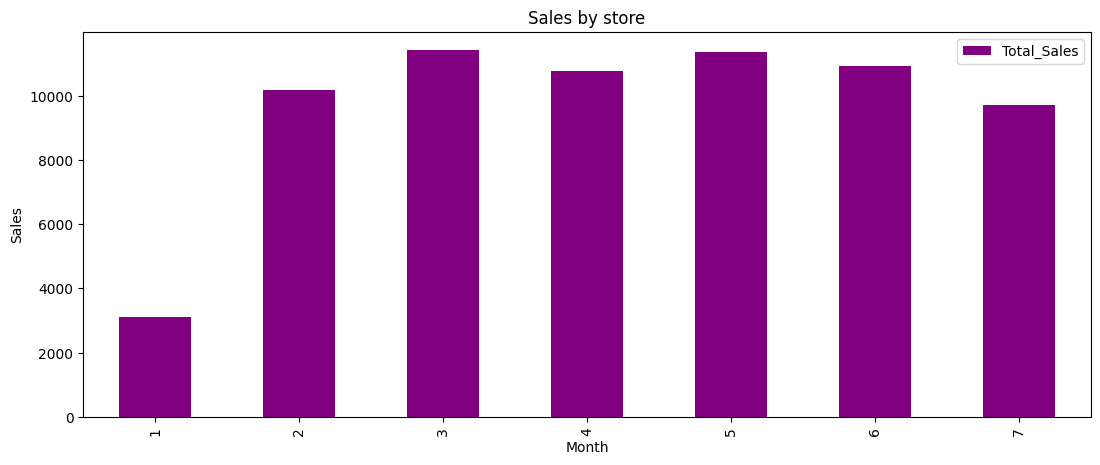

In [19]:
cursor.execute("""Select Extract(month from payment.payment_date)as month ,sum(payment.amount) as Total_sales from payment group by month order by month ASC;
""");
rows=cursor.fetchall()
print(rows)
df=pd.DataFrame(rows)
df.columns=("month","Total_Sales")
df["Total_Sales"] = pd.to_numeric(df["Total_Sales"])



df.plot.bar(x="month", y="Total_Sales",color='purple',figsize=(13,5))

plt.title("Sales by store")
plt.xlabel("Month")
plt.ylabel("Sales")

plt.show()

Analysis:-Rentals completed and incomplete corresponding to Store_ids

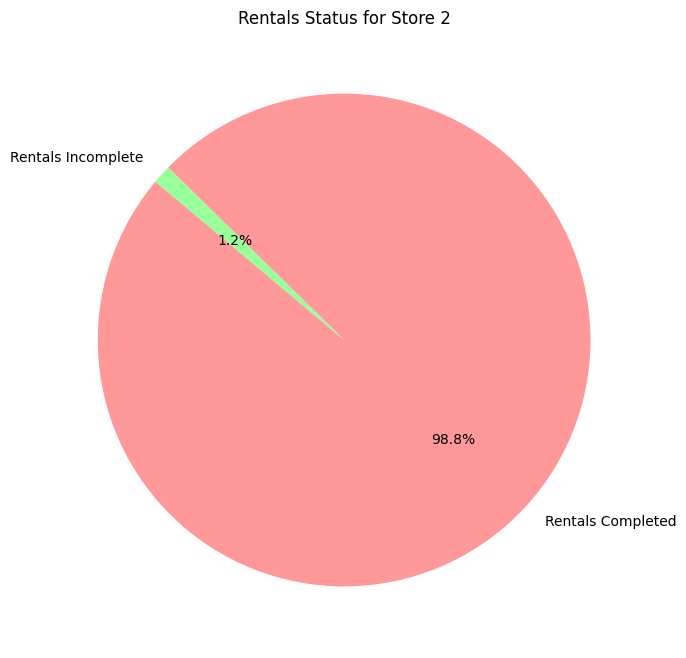

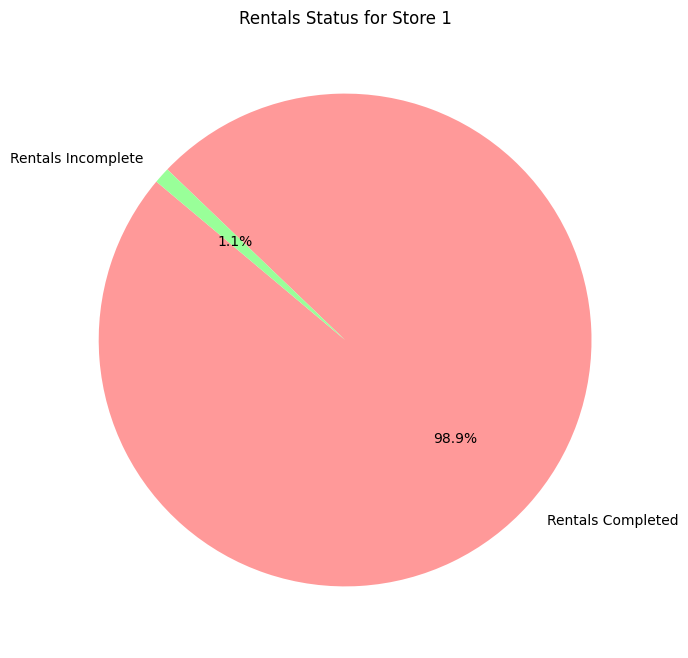

In [20]:


cursor.execute("""
    SELECT staff.store_id, COUNT(*) as Rentals_completed
    FROM staff
    JOIN rental ON staff.staff_id = rental.staff_id 
    WHERE rental.return_date IS NOT NULL
    GROUP BY staff.store_id;
""")
completed_rows = cursor.fetchall()

cursor.execute("""
    SELECT staff.store_id, COUNT(*) as Rentals_incomplete
    FROM staff
    JOIN rental ON staff.staff_id = rental.staff_id 
    WHERE rental.return_date IS NULL
    GROUP BY staff.store_id;
""")
incomplete_rows = cursor.fetchall()

# Create DataFrames for completed and incomplete rentals
df_completed = pd.DataFrame(completed_rows, columns=["Store_id", "Rentals_completed"])
df_incomplete = pd.DataFrame(incomplete_rows, columns=["Store_id", "Rentals_incomplete"])

# Merge the two DataFrames on "Store_id"
merged_df = pd.merge(df_completed, df_incomplete, on="Store_id", how="outer")

# Fill NaN values with 0 (for stores with only completed or incomplete rentals)
merged_df = merged_df.fillna(0)

# Iterate over each store and create a separate pie chart
for _, row in merged_df.iterrows():
    store_id = row["Store_id"]
    rentals_completed = row["Rentals_completed"]
    rentals_incomplete = row["Rentals_incomplete"]

    # Create a pie chart for each store
    plt.figure(figsize=(8, 8))
    plt.pie([rentals_completed, rentals_incomplete], labels=["Rentals Completed", "Rentals Incomplete"],colors = ["#ff9999", "#99ff99"], startangle=140, autopct='%1.1f%%')
    plt.title(f"Rentals Status for Store {store_id}")
    plt.show()
